### 01. Setup

In [ ]:
from src.solvers import generate_scrambled_cube, a_star_solver,bfs_solver,ids_solver
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

MAX_MOVES = 5

COLORS = ["#D32F2F", "#FFA726", "#A020F0", "#00838F", "#FF6F00"]  

ALGORITMOS = {
    "BFS": bfs_solver,
    "IDS": ids_solver,
    "A*": a_star_solver,
}

def plot(ax,title:str, label_x:str, label_y:str,dados_algoritmos):
    ax.set_title(title)
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Remove moldura
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.show()
          

### 02. Testes 

In [2]:
dados_algoritmos = {
    nome: {
        "movimentos": [],
        "tempo": [],
        "nos": [],
        "passos": [],
        "memoria": [],
        "branching": [],
        "solution": [],
        "problem": []
    }
    for nome in ALGORITMOS
}

for n in range(1, MAX_MOVES + 1):
    print(f'\n=== Embaralhamento com {n} movimentos ===')
    scrambled_cube, scramble_seq = generate_scrambled_cube(n)
    print(f'Movimentos de embaralhamento: {scramble_seq}')

    for nome_alg, func in ALGORITMOS.items():
        print(f'\n[{nome_alg}]')
        (solution, memoria, nodes, branching),tempo = func(scrambled_cube)

        if solution:
            print(f'Solução ({len(solution)} passos): {solution}')
            print(f'Tempo: {tempo:.4f}s | Nós: {nodes}')
            dados_algoritmos[nome_alg]["movimentos"].append(n)
            dados_algoritmos[nome_alg]["tempo"].append(tempo)
            dados_algoritmos[nome_alg]["nos"].append(nodes)
            dados_algoritmos[nome_alg]["passos"].append(len(solution))
            dados_algoritmos[nome_alg]["memoria"].append(memoria)
            dados_algoritmos[nome_alg]["branching"].append(branching)
            dados_algoritmos[nome_alg]["solution"].append(solution)
            dados_algoritmos[nome_alg]["problem"].append(scramble_seq)
        else:
            print('Solução não encontrada.')
            dados_algoritmos[nome_alg]["movimentos"].append(n)
            dados_algoritmos[nome_alg]["tempo"].append(None)
            dados_algoritmos[nome_alg]["nos"].append(None)
            dados_algoritmos[nome_alg]["passos"].append(None)
            dados_algoritmos[nome_alg]["memoria"].append(None)
            dados_algoritmos[nome_alg]["branching"].append(None)
            dados_algoritmos[nome_alg]["solution"].append(None)
            dados_algoritmos[nome_alg]["problem"].append(scramble_seq)



=== Embaralhamento com 1 movimentos ===
Movimentos de embaralhamento: ['U']

[BFS]
Solução (1 passos): ["U'"]
Tempo: 0.0349s | Nós: 3

[IDS]
Solução (1 passos): ["U'"]
Tempo: 0.0096s | Nós: 4

[A*]
Solução (1 passos): ["U'"]
Tempo: 0.0778s | Nós: 2


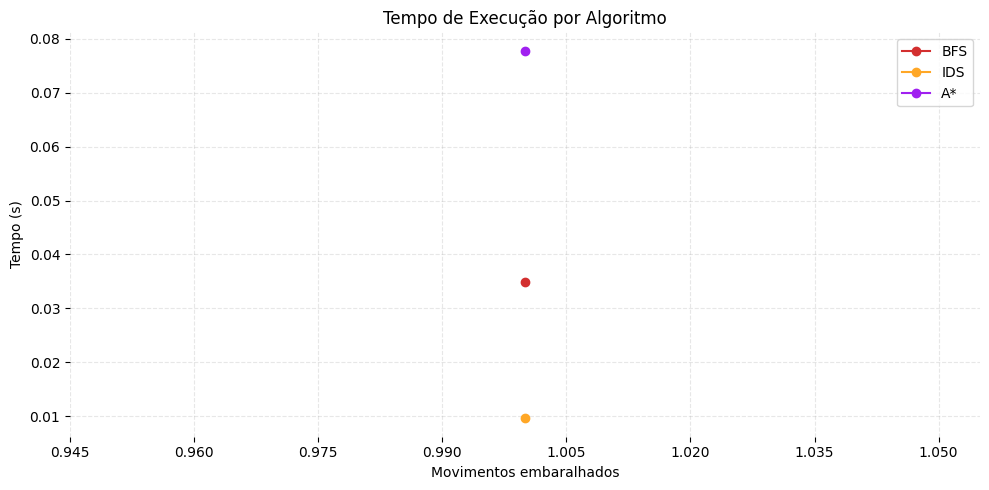

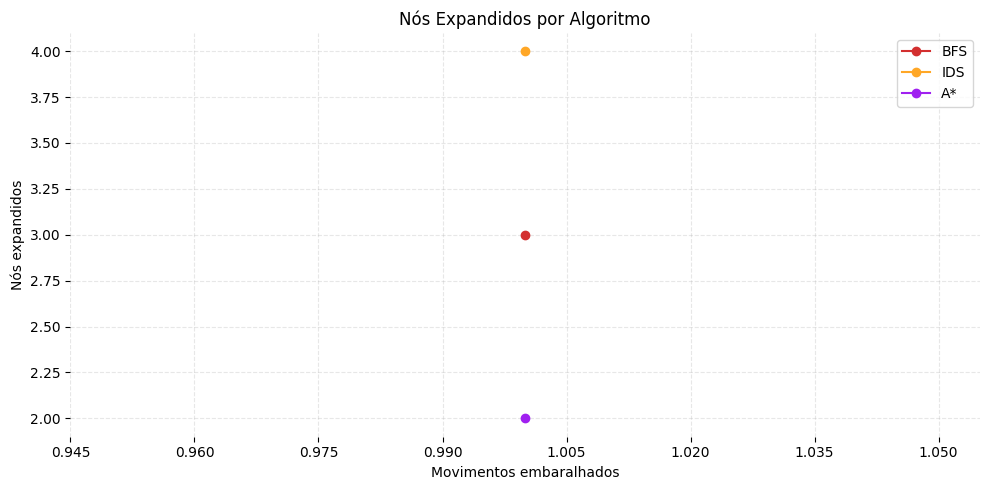

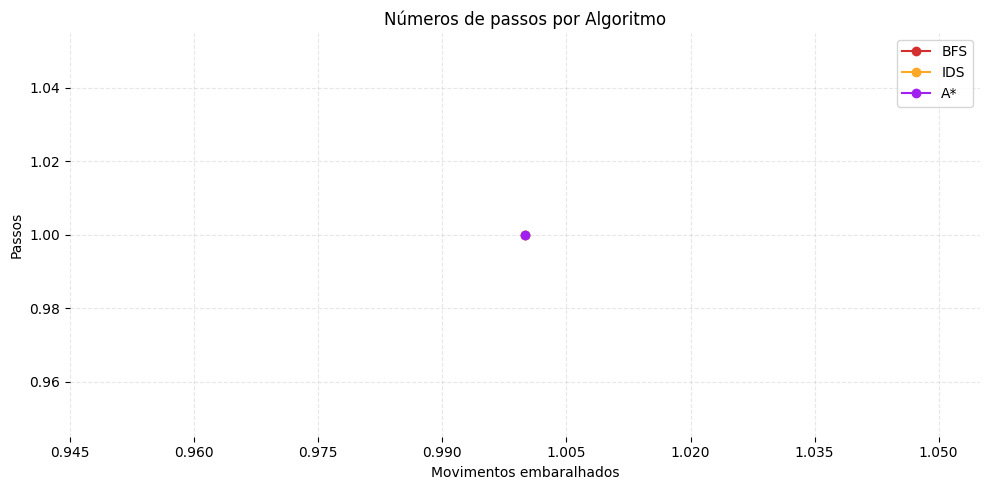

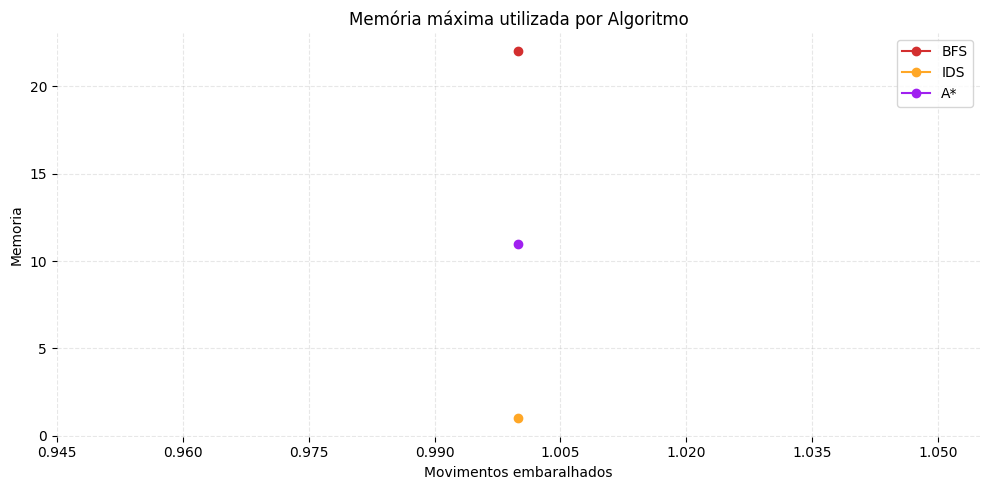

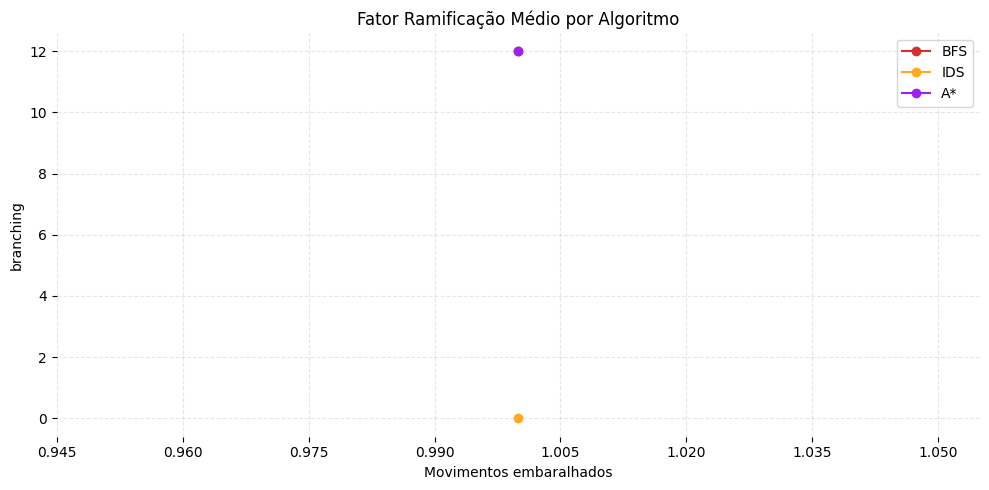

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
for index, nome_alg in enumerate(ALGORITMOS):
    ax.plot(
        dados_algoritmos[nome_alg]["movimentos"],
        dados_algoritmos[nome_alg]["tempo"],
        marker='o',
        label=nome_alg,
        color=COLORS[index]
    )
plot(ax=ax,title="Tempo de Execução por Algoritmo",label_x="Movimentos embaralhados",label_y="Tempo (s)",dados_algoritmos=dados_algoritmos)

fig, ax = plt.subplots(figsize=(10, 5))
for index, nome_alg in enumerate(ALGORITMOS):
    ax.plot(
        dados_algoritmos[nome_alg]["movimentos"],
        dados_algoritmos[nome_alg]["nos"],
        marker='o',
        label=nome_alg,
        color=COLORS[index]
    )
plot(ax=ax,title="Nós Expandidos por Algoritmo",label_x="Movimentos embaralhados",label_y="Nós expandidos",dados_algoritmos=dados_algoritmos)

fig, ax = plt.subplots(figsize=(10, 5))
for index, nome_alg in enumerate(ALGORITMOS):
    ax.plot(
        dados_algoritmos[nome_alg]["movimentos"],
        dados_algoritmos[nome_alg]["passos"],
        marker='o',
        label=nome_alg,
        color=COLORS[index]
    )
plot(ax=ax,title="Números de passos por Algoritmo",label_x="Movimentos embaralhados",label_y="Passos",dados_algoritmos=dados_algoritmos)


fig, ax = plt.subplots(figsize=(10, 5))
for index, nome_alg in enumerate(ALGORITMOS):
    ax.plot(
        dados_algoritmos[nome_alg]["movimentos"],
        dados_algoritmos[nome_alg]["memoria"],
        marker='o',
        label=nome_alg,
        color=COLORS[index]
    )
plot(ax=ax,title="Memória máxima utilizada por Algoritmo",label_x="Movimentos embaralhados",label_y="Memoria",dados_algoritmos=dados_algoritmos)


fig, ax = plt.subplots(figsize=(10, 5))
for index, nome_alg in enumerate(ALGORITMOS):
    ax.plot(
        dados_algoritmos[nome_alg]["movimentos"],
        dados_algoritmos[nome_alg]["branching"],
        marker='o',
        label=nome_alg,
        color=COLORS[index]
    )
plot(ax=ax,title="Fator Ramificação Médio por Algoritmo",label_x="Movimentos embaralhados",label_y="branching",dados_algoritmos=dados_algoritmos)

In [4]:
linhas = []
for nome_alg, dados in dados_algoritmos.items():
    for i in range(len(dados["movimentos"])):
        linhas.append({
            "Movimentos Embaralhados": dados["movimentos"][i],
            "Algoritmo": nome_alg,
            "Passos Solução": dados["passos"][i],
            "Tempo (s)": dados["tempo"][i],
            "Memória Máx.": dados["memoria"][i],
            "Nós Expandidos": dados["nos"][i],
            "Fator Ramificação Média": dados["branching"][i],
            "Solução": dados["solution"][i],
            "Problema": dados["problem"][i]
        })

df = pd.DataFrame(linhas)
df = df.sort_values(by="Movimentos Embaralhados").reset_index(drop=True)
df.to_csv("results.csv",index=False)